## Import Libraries

In [1]:
import numpy as np
from numpy.random import randint
from scipy.stats import norm

from keras.layers import Dense, Lambda
from keras.models import Sequential
from keras.backend import concatenate, square
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.vis_utils import plot_model

np.random.seed(22)

## Data Operations

### Generate Real Samples

In [2]:
def generate_real_samples(mean, variance, sample_size):
    distribution = norm(loc=mean, scale=variance) # define the distribution
    samples = distribution.rvs(size=sample_size)  # generate the samples
    return np.array(samples).reshape(-1, 1)

#### Example

In [3]:
mean = 0 # the mean of the distribution
variance = 1 # the variance of the distribution
sample_size = 1000 # the number of samples to generate

data = generate_real_samples(mean, variance, sample_size) # generate samples
print(data[0:100].reshape(1, -1)) # visualise the data

[[-0.09194992 -1.46335065  1.08179168 -0.23932517 -0.49112914 -1.00227201
   0.9188215  -1.1036321   0.62649346 -0.56151378  0.02885512 -0.23076719
   0.58775221  0.75231758 -1.05850255  1.05597241  0.74775027  1.06467659
   1.52012959 -1.48860294  1.85998989 -1.59861303 -0.64607361  0.337325
   1.04672873  0.62914334  0.36305909  0.5557497  -1.08854953  0.02369477
   2.49917664 -2.49003039 -0.23486239 -0.09756346 -0.88652934 -0.13671324
   0.10197893 -0.25092954 -0.0788123  -1.08516417  0.59492845 -0.63890807
  -1.10783686  2.10614576 -0.56738777 -0.47994979 -1.92322986  0.39958854
  -1.04818387 -0.6938787   0.74533915  0.53690999 -0.73272178  0.55571563
   0.4322893  -0.13580398 -0.94110609  0.48476736 -1.53282145  0.40497889
   0.01282612 -1.23171556 -1.05308502  2.51622182 -2.0390285   0.09448731
  -0.31482334  0.49031472  0.35497619  0.95071135  0.7603718   0.01150363
  -1.37605696 -0.27155468  0.54225205  0.53552221  1.15999804 -0.16500505
  -1.17940257 -0.54529895  0.27050267  0

### Select Real Samples

In [4]:
# select real sample
def select_real_samples(data, sample_size):
    # choose random instances
    indices = randint(0, data.shape[0], sample_size)

    # retrieve selected images
    X = data[indices]

    # generate 'real' class labels (1)
    y = np.ones((sample_size, 1))
    return X, y

#### Example

In [5]:
X, y = select_real_samples(data, 100)
# visualise the data
print(X.reshape(1, -1))
print(y.reshape(1, -1))

[[-1.22158769e+00 -1.35059654e+00  2.84799945e+00  1.01496587e+00
  -4.39309097e-01 -6.26051095e-01 -1.23136227e-02  1.15036262e-02
   5.09755779e-01 -2.24126055e-01 -4.23833446e-01 -1.79085778e+00
   8.14585542e-03 -6.09271454e-01 -7.64625528e-01  6.70361235e-01
  -6.90143470e-01  5.92309144e-02 -4.23833446e-01  1.59372088e-01
  -2.89479436e-01 -3.92324639e-02 -4.07215819e-01 -1.58095568e-01
   1.74644666e+00  1.18337723e-03 -1.14282386e+00 -5.99167637e-01
  -2.71554684e-01 -1.39818380e+00  1.25674235e-01  4.20292718e-01
  -5.46220334e-01  8.14585542e-03  1.01327835e+00  7.96566754e-02
  -1.34302326e-01  3.46417191e-01 -2.71554684e-01 -5.06884348e-01
  -4.21666212e-01  2.10614576e+00 -1.77586494e+00 -9.59577907e-01
  -2.32487901e-02 -5.38170136e-01 -1.43595694e+00  9.79467630e-02
   7.47750266e-01  5.55724383e-01  1.57529067e-01 -6.72613516e-02
   1.37513064e+00  6.26493456e-01 -8.28574450e-01  1.44002141e+00
  -2.71128886e-01  9.61105400e-01  2.70502670e-01 -5.91848825e-01
  -1.77819

### Generate Points in Latent Space

In [6]:
# generate points in latent space as input for the generator
def generate_latent_points(mean, variance, latent_dim, sample_size):
    # generate points in the latent space
    input =  np.random.normal(mean, variance, size=(latent_dim * sample_size))

    # reshape into a batch of inputs for the network
    input = input.reshape(sample_size, latent_dim)
    return input

#### Example

In [7]:
mean = 0 # the mean of the distribution
variance = 1 # the variance of the distribution
latent_dim = 1 # the latnet space dimension
sample_size = 1000 # the number of samples to generate

input = generate_latent_points(mean, variance, latent_dim, sample_size)
print(input[0:100].reshape(1, -1))

[[ 2.84373515e-01 -1.50592636e-01 -4.34944059e-01  2.20847256e-01
  -4.73256542e-01 -5.42464235e-01 -1.27394148e+00  3.10659205e-01
   1.27664889e+00 -1.01195199e+00 -8.93084064e-01  4.80866128e-01
   5.18430671e-01  6.44504468e-01 -6.93614682e-01  3.94733063e-02
  -7.00901059e-01  1.87195133e-01 -1.33449713e+00  1.65674625e-01
  -1.55168094e+00  1.87690934e+00 -1.63642814e+00 -1.56026284e-02
   1.17015761e+00 -2.69344484e-01  4.91233354e-01 -1.18371564e+00
   8.28004245e-01  1.18752772e+00  1.11014605e+00 -4.36246019e-01
   1.36939079e+00  3.26586751e-01  1.45836356e-02 -7.08890574e-01
   7.15196047e-01  4.61064193e-01 -5.97837664e-01 -8.60321644e-01
  -3.15371919e-02 -1.51632363e+00  8.92744725e-01  8.08699706e-01
   1.04244751e+00 -4.26513111e-01  2.86547772e+00  4.14611227e-01
   1.48234108e+00  7.42139233e-01  1.07902434e+00 -7.70573691e-01
   1.37753778e+00 -4.66921515e-01 -1.53102126e+00 -1.55485883e-01
   1.48871603e+00  8.02014740e-01  3.20249840e-01 -1.08451866e+00
   1.14532

### Generate Fake Samples

In [8]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, mean, variance, latent_dim, sample_size):
    # generate points in latent space
    points = generate_latent_points(mean, variance, latent_dim, sample_size)

    # predict outputs
    X = generator.predict(points, verbose=0)

    # create 'fake' class labels (0)
    y = np.zeros((sample_size, 1))
    return X, y

## Models

### Generator

In [9]:
# create the standalone generator model
def create_generator(latent_dim):
    # create the generator model
    model = Sequential()

    # add a Dense layer with linear activation
    # this is the input layer, and it takes random noise of size latent_dim as input
    model.add(Dense(1, input_dim=latent_dim, activation='linear', use_bias=True))

    # return the generator model
    return model

### Discriminator

In [10]:
def create_discriminator():
    # initialize a Sequential model
    model = Sequential()

    # add a Lambda layer to concatenate the input
    model.add(Lambda(lambda x: concatenate([x, x**2], axis=-1)))
    
    # add a Dense layer to the model
    # with one neuron and sigmoid activation function
    # input shape is a 1D vector of length 2
    # use_bias is set to True
    model.add(Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True))
    
    # compile the model with binary cross-entropy loss and Adam optimizer
    # learning rate is set to 0.001
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # return the discriminator model
    return model

### Full GAN

In [11]:
# create the combined generator and discriminator model, for updating the generator
def create_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False

    # connect them
    model = Sequential()

    # add generator
    model.add(generator)

    # add the discriminator
    model.add(discriminator)

    # compile the model with binary cross-entropy loss and Adam optimizer
    # learning rate is set to 0.001
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # return the discriminator model
    return model

## Visualization Plots

### Plot Distributions

In [12]:
# Define a function to plot the distributions
def plot_distributions(iteration, real_data, generated_data):
    sns.kdeplot(real_data.flatten(), fill=True, color='blue', label='Real Data')
    sns.kdeplot(generated_data.flatten(), fill=True, color='red', label='Generated Data')
    plt.title(f'Iteration: {iteration}')
    plt.legend()
    plt.show()

#### Example

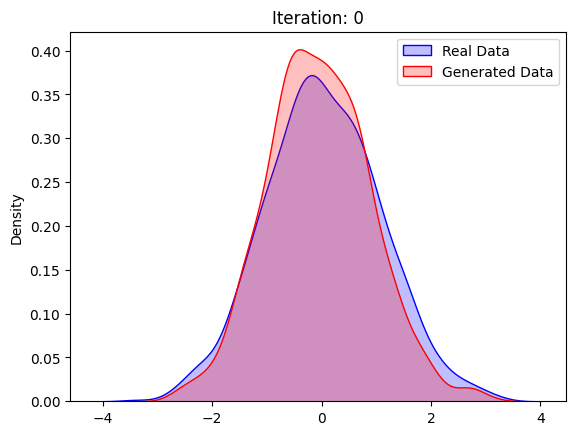

In [13]:
plot_distributions(0, data, input)

### Plot Model Performance

In [14]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, generated, discriminator, dataset, mean, variance, latent_dim, sample_size=100):
    # prepare real samples
    X_real, y_real = select_real_samples(dataset, sample_size)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(X_real, y_real)
    # prepare fake examples
    X_fake, y_fake = generate_fake_samples(generated, mean, variance, latent_dim, sample_size)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(X_fake, y_fake)
    # summarize discriminator performance
    print('Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    plot_distributions(epoch, X_real, X_fake)
    print()

    # save the generator model tile file
    filename = 'Generator Model %03d.h5' % (epoch)
    generated.save(filename)

## Train Model

In [15]:
# train the generator and discriminator
def train(generator, discriminator, gan, data, mean, variance, latent_dim, epochs=2500, batch_size=100):
    batch_per_epoch = int(data.shape[0] / batch_size)
    half_batch = int(batch_size / 2)

    summarize_performance(0, generator, discriminator, data, mean, variance, latent_dim)

    # manually enumerate epochs
    for epoch in range(epochs+1):
        # enumerate batches over the training set
        for batch in range(batch_per_epoch):
            # get randomly selected 'real' samples
            X_real, y_real = select_real_samples(data, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(generator, mean, variance, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = discriminator.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(mean, variance, latent_dim, batch_size)
            # create inverted labels for the fake samples
            y_gan = np.ones((batch_size, 1))
            # update the generator via the discriminator's error
            g_loss = gan.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
        # evaluate the model performance, sometimes
        if (epoch+1) % 100 == 0:
            print(f'Epoch: ({epoch+1}/{epochs})\t' + 
                  f'discriminator_loss={np.round(d_loss, 4)},\t gan_loss={np.round(g_loss, 4)}')
            print()
        if (epoch+1) % 500 == 0:
            summarize_performance(epoch+1, generator, discriminator, data, mean, variance, latent_dim)


## Generate Data

In [16]:
mean = -2 # the mean of the distribution
variance = 1 # the variance of the distribution
sample_size = 1000 # the number of samples to generate

data = generate_real_samples(mean, variance, sample_size) # generate samples

## Create GAN

In [17]:
# size of the latent space
latent_dim = 1
# create the discriminator
discriminator = create_discriminator()
# create the generator
generator = create_generator(latent_dim)
# create the gan
gan = create_gan(generator, discriminator)

## Start Experiments

4/4 [==============================] - 0s 6ms/step - loss: 1.6091 - accuracy: 0.0400
Accuracy real: 98%, fake: 4%


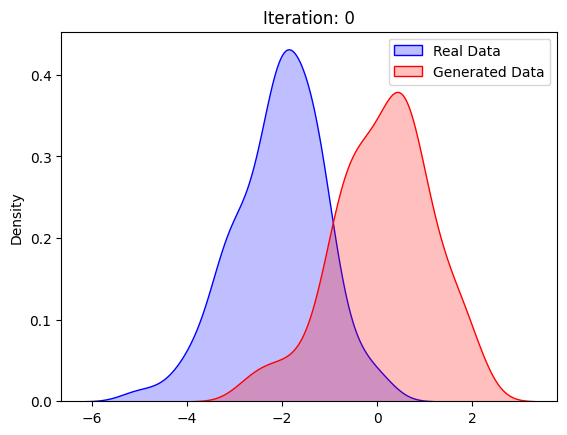


Epoch: (100/2500)	discriminator_loss=0.6979,	 gan_loss=[0.761 0.36 ]

Epoch: (200/2500)	discriminator_loss=0.6666,	 gan_loss=[0.7194 0.63  ]

Epoch: (300/2500)	discriminator_loss=0.7078,	 gan_loss=[0.6972 0.59  ]

Epoch: (400/2500)	discriminator_loss=0.6923,	 gan_loss=[0.7286 0.    ]

Epoch: (500/2500)	discriminator_loss=0.6988,	 gan_loss=[0.7032 0.3   ]

4/4 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.7300
Accuracy real: 27%, fake: 73%


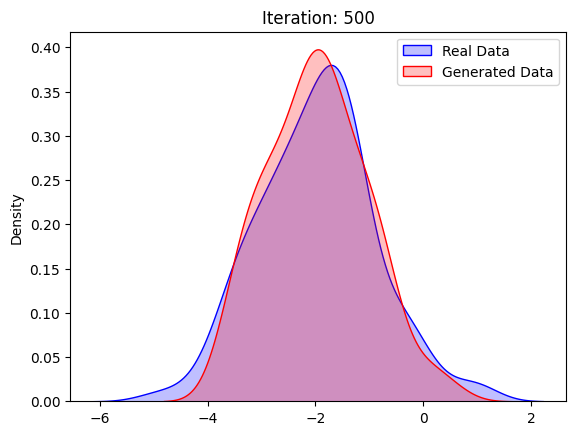


Epoch: (600/2500)	discriminator_loss=0.6959,	 gan_loss=[0.687 0.74 ]

Epoch: (700/2500)	discriminator_loss=0.6923,	 gan_loss=[0.7018 0.05  ]

Epoch: (800/2500)	discriminator_loss=0.6926,	 gan_loss=[0.6861 0.87  ]

Epoch: (900/2500)	discriminator_loss=0.6915,	 gan_loss=[0.684 1.   ]

Epoch: (1000/2500)	discriminator_loss=0.6928,	 gan_loss=[0.6803 0.8   ]

4/4 [==============================] - 0s 6ms/step - loss: 0.7084 - accuracy: 0.1400
Accuracy real: 85%, fake: 14%


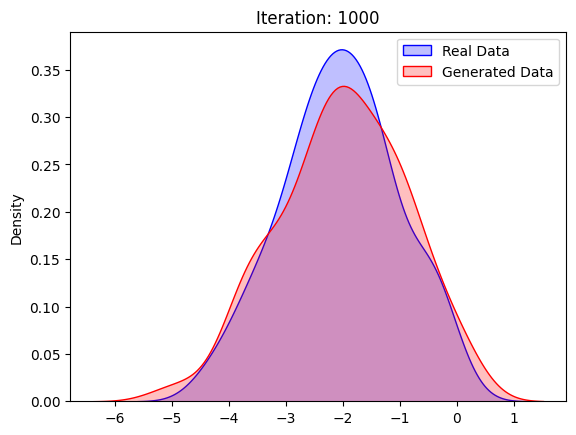


Epoch: (1100/2500)	discriminator_loss=0.6969,	 gan_loss=[0.6588 1.    ]

Epoch: (1200/2500)	discriminator_loss=0.6952,	 gan_loss=[0.7019 0.19  ]

Epoch: (1300/2500)	discriminator_loss=0.6934,	 gan_loss=[0.6875 0.82  ]

Epoch: (1400/2500)	discriminator_loss=0.6916,	 gan_loss=[0.6979 0.56  ]

Epoch: (1500/2500)	discriminator_loss=0.6962,	 gan_loss=[0.709 0.   ]

4/4 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 1.0000
Accuracy real: 0%, fake: 100%


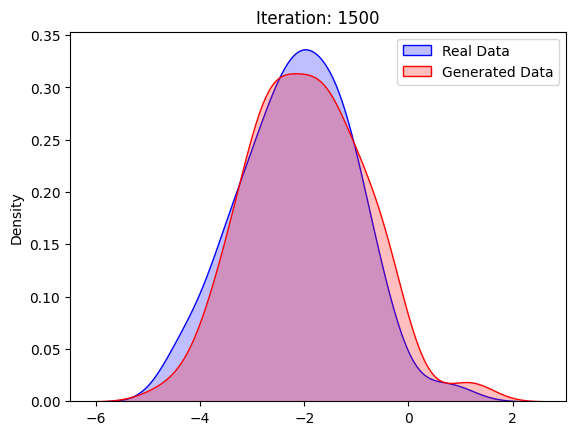


Epoch: (1600/2500)	discriminator_loss=0.6937,	 gan_loss=[0.6795 0.85  ]

Epoch: (1700/2500)	discriminator_loss=0.6922,	 gan_loss=[0.6843 0.82  ]

Epoch: (1800/2500)	discriminator_loss=0.6953,	 gan_loss=[0.6837 0.72  ]

Epoch: (1900/2500)	discriminator_loss=0.6929,	 gan_loss=[0.6893 0.71  ]

Epoch: (2000/2500)	discriminator_loss=0.6922,	 gan_loss=[0.6875 0.43  ]

4/4 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.5000
Accuracy real: 48%, fake: 50%


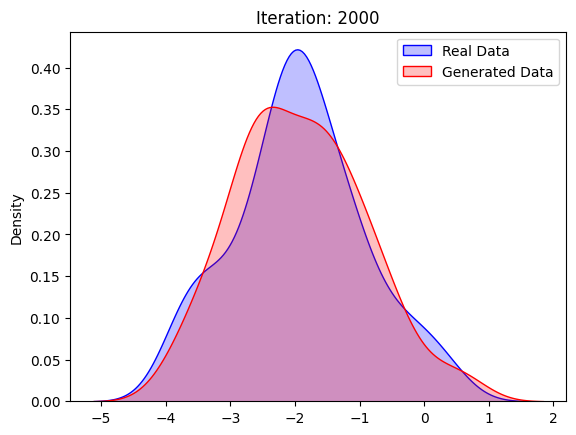


Epoch: (2100/2500)	discriminator_loss=0.6934,	 gan_loss=[0.6852 1.    ]

Epoch: (2200/2500)	discriminator_loss=0.6935,	 gan_loss=[0.6898 0.61  ]

Epoch: (2300/2500)	discriminator_loss=0.6938,	 gan_loss=[0.6778 1.    ]

Epoch: (2400/2500)	discriminator_loss=0.6928,	 gan_loss=[0.6871 0.54  ]

Epoch: (2500/2500)	discriminator_loss=0.6927,	 gan_loss=[0.7064 0.35  ]

4/4 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.7700
Accuracy real: 26%, fake: 77%


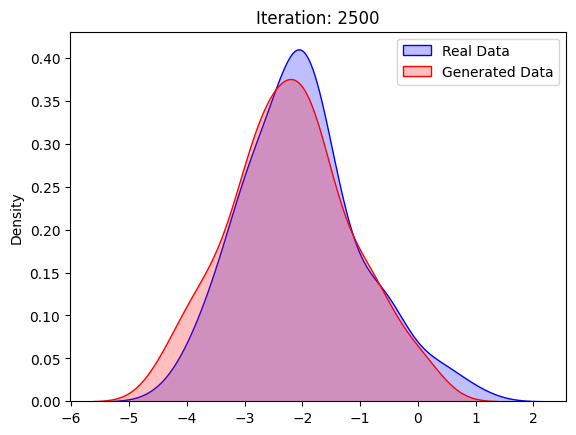

In [18]:
mean = 0 # the mean of the distribution
variance = 1 # the variance of the distribution
# train model
train(generator, discriminator, gan, data, mean, variance, latent_dim)